In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MNISTデータセットをダウンロード
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# 特徴量とラベルを取得
X = mnist.data
y = mnist.target

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの構築と訓練
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# テストデータセットでの予測
y_pred = model.predict(X_test)

# 正答率の計算
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



/opt/homebrew/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9683571428571428


Updated Accuracy: 0.9683571428571428
[0]
<class 'numpy.ndarray'>


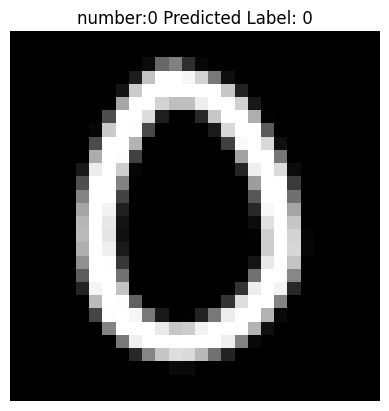

[0]
<class 'numpy.ndarray'>


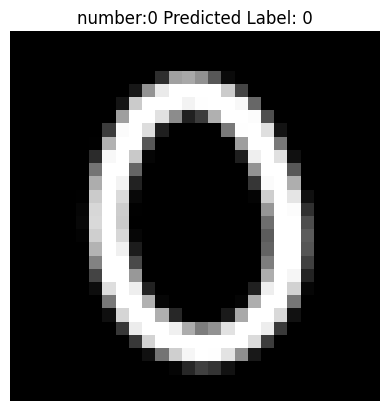

[1]
<class 'numpy.ndarray'>


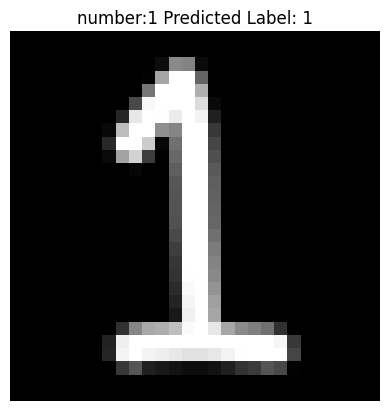

[1]
<class 'numpy.ndarray'>


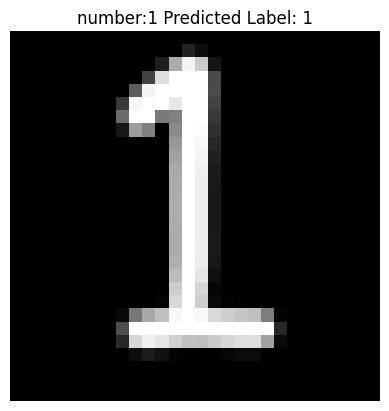

[2]
<class 'numpy.ndarray'>


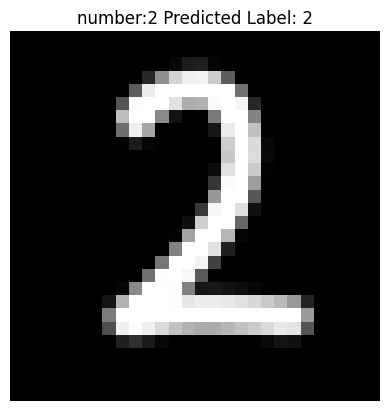

[2]
<class 'numpy.ndarray'>


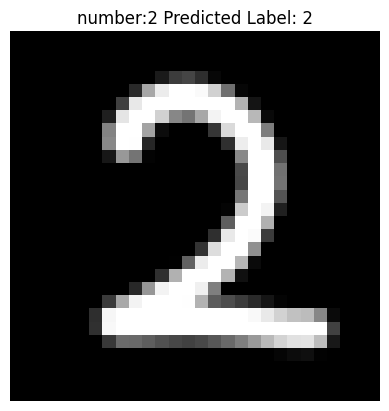

[3]
<class 'numpy.ndarray'>


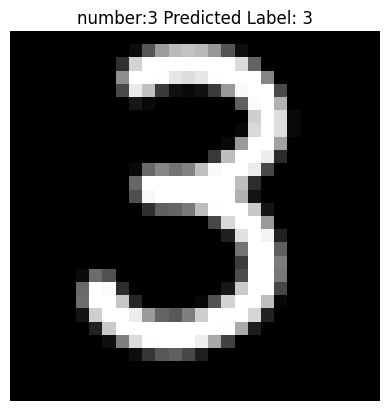

[3]
<class 'numpy.ndarray'>


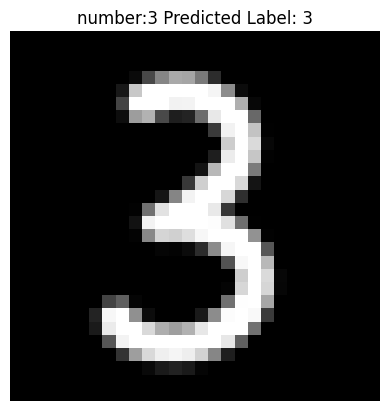

[4]
<class 'numpy.ndarray'>


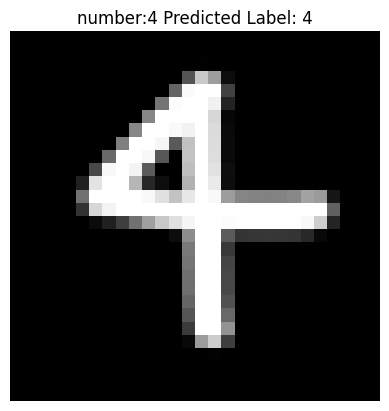

[4]
<class 'numpy.ndarray'>


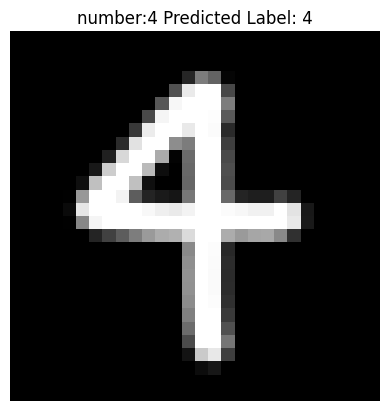

[5]
<class 'numpy.ndarray'>


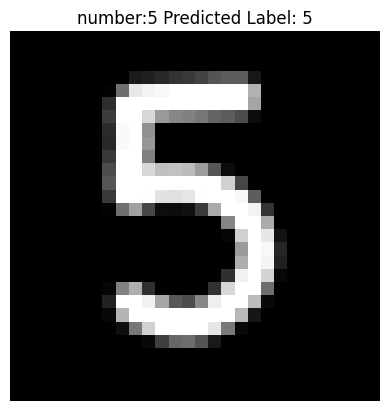

[5]
<class 'numpy.ndarray'>


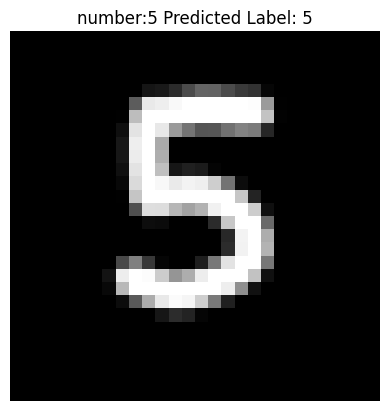

[6]
<class 'numpy.ndarray'>


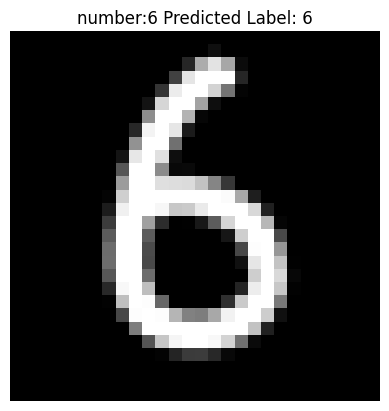

[6]
<class 'numpy.ndarray'>


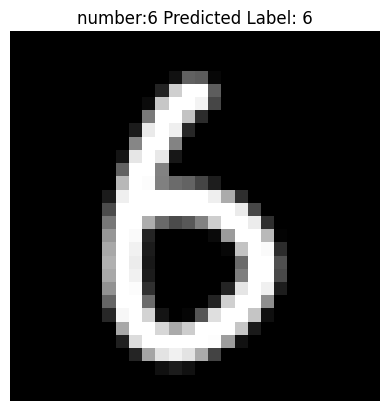

[7]
<class 'numpy.ndarray'>


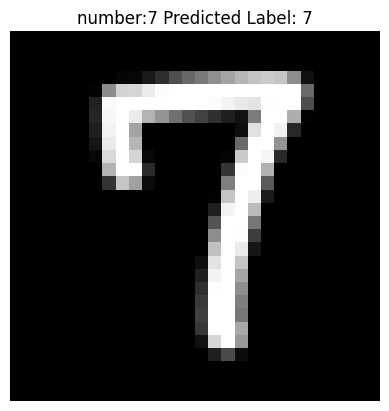

[7]
<class 'numpy.ndarray'>


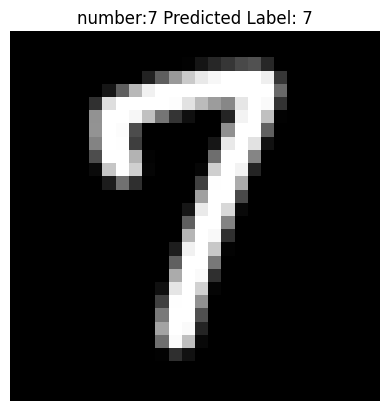

[8]
<class 'numpy.ndarray'>


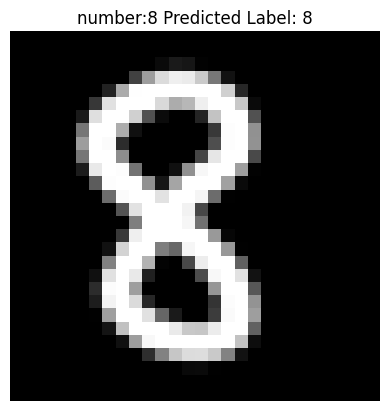

[8]
<class 'numpy.ndarray'>


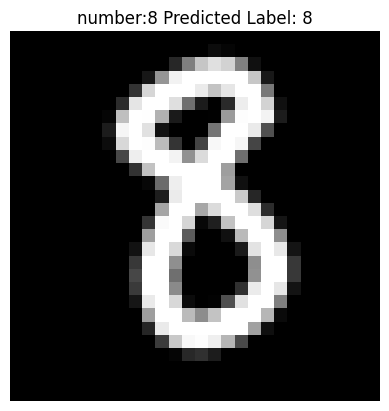

[9]
<class 'numpy.ndarray'>


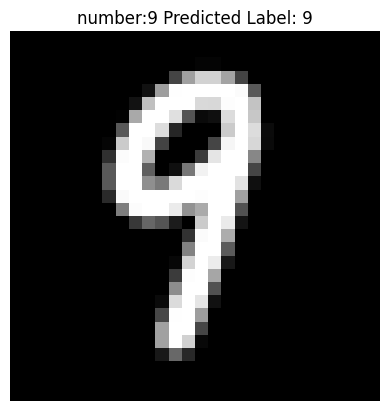

[9]
<class 'numpy.ndarray'>


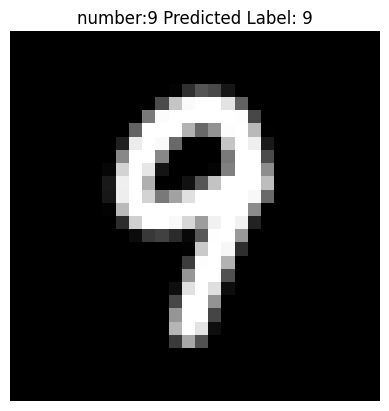

Accuracy: 1.0


In [6]:
# 手書き画像の読み込みと前処理
i = 1
j = 0
while i <= 6:
    while j <= 9:
        image = Image.open('digits' + str(i) + '_' + str(j) +'.PNG').convert('L')  # 手書き画像のパスを指定して読み込む
        image = image.resize((28, 28))  # 28x28にリサイズ
        image = np.array(image)  # NumPy配列に変換
        image = image.reshape(1, -1)  # 1次元の特徴量ベクトルに変換
        #image = image / 255.0  # スケーリング (0から1の範囲に正規化)
        image = 255.0 - image

        # ラベルの作成
        label = np.array([j])

        # データを追加
        X_train = np.vstack((X_train, image))
        y_train = np.concatenate((y_train, label))
        j += 1
    i += 1


y_train = np.array(y_train, dtype=int)

# 新しい学習データでモデルを再訓練
model.fit(X_train, y_train)





['0']
<class 'numpy.ndarray'>


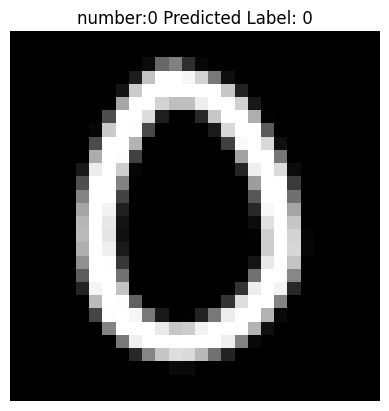

['0']
<class 'numpy.ndarray'>


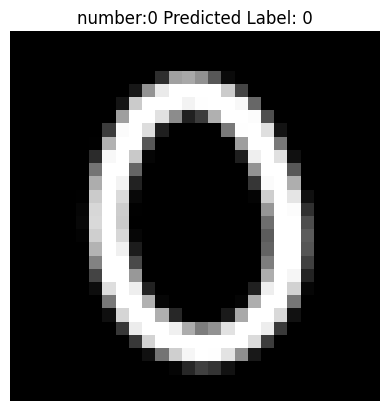

['0']
<class 'numpy.ndarray'>


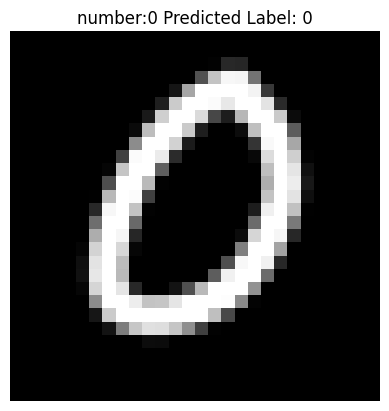

['3']
<class 'numpy.ndarray'>


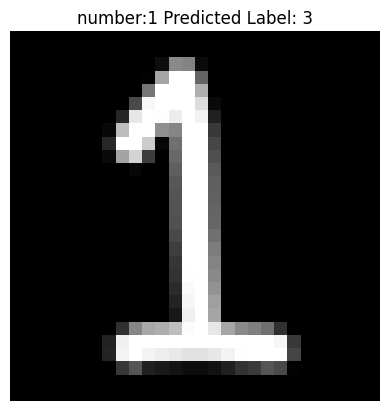

['1']
<class 'numpy.ndarray'>


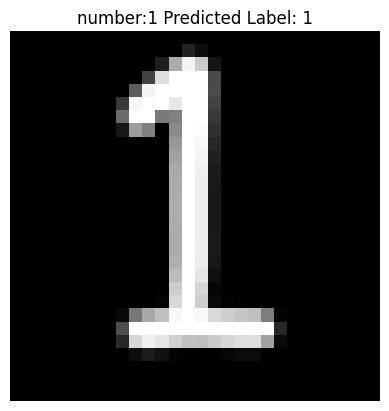

['3']
<class 'numpy.ndarray'>


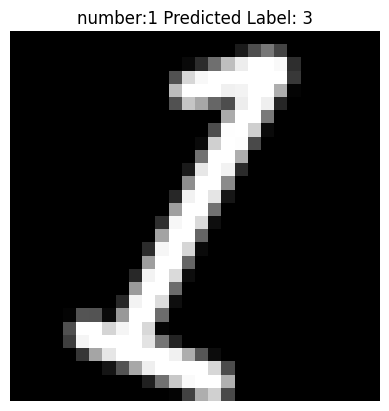

['2']
<class 'numpy.ndarray'>


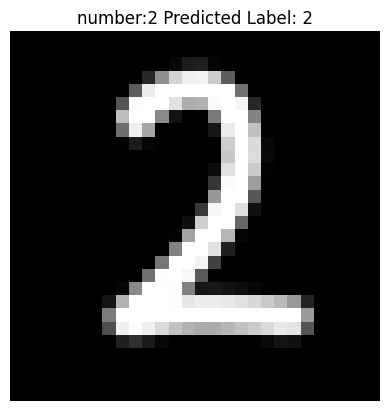

['2']
<class 'numpy.ndarray'>


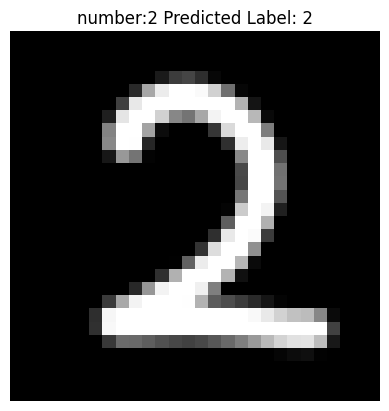

['2']
<class 'numpy.ndarray'>


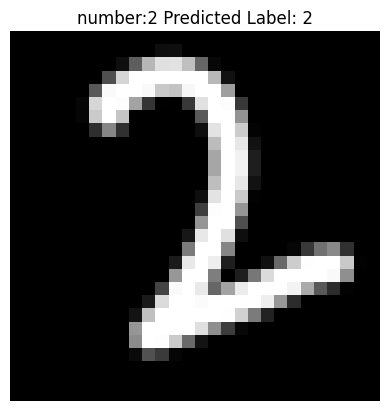

['3']
<class 'numpy.ndarray'>


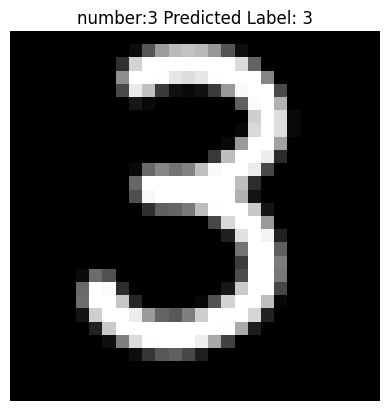

['3']
<class 'numpy.ndarray'>


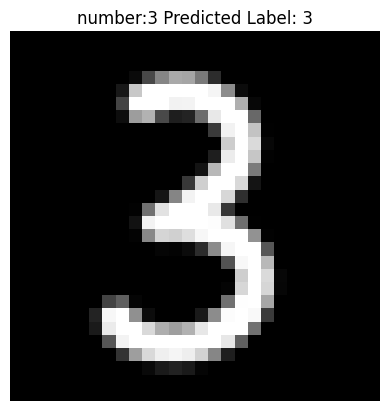

['3']
<class 'numpy.ndarray'>


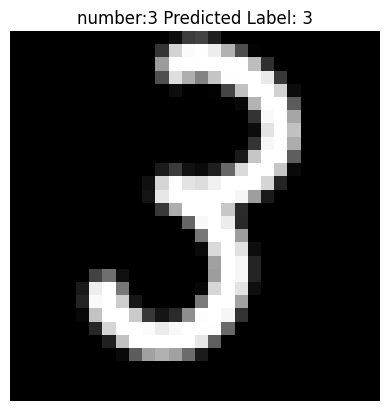

['8']
<class 'numpy.ndarray'>


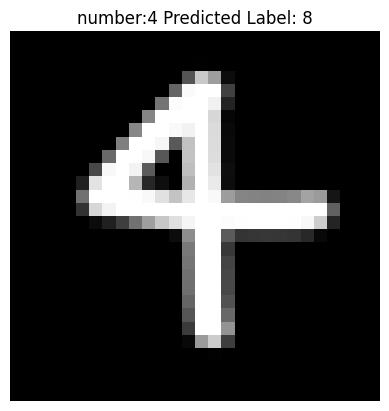

['9']
<class 'numpy.ndarray'>


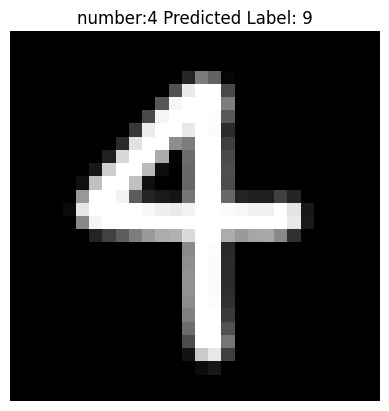

['8']
<class 'numpy.ndarray'>


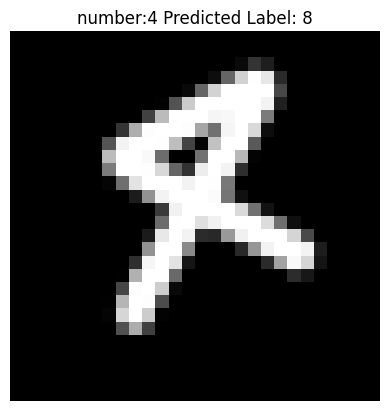

['5']
<class 'numpy.ndarray'>


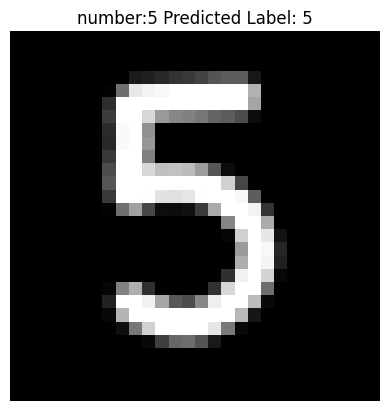

['5']
<class 'numpy.ndarray'>


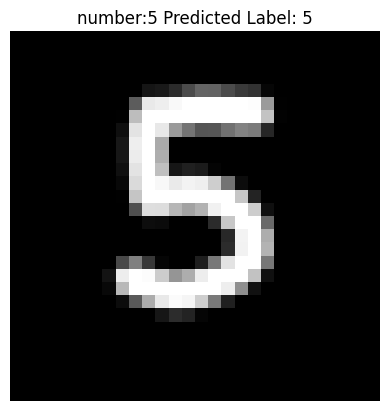

['5']
<class 'numpy.ndarray'>


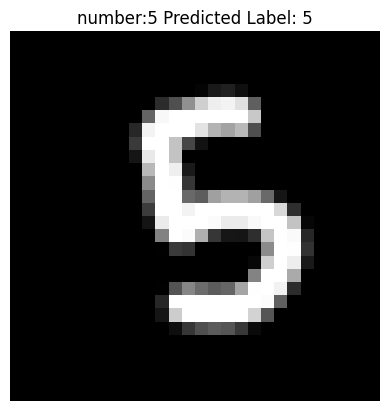

['6']
<class 'numpy.ndarray'>


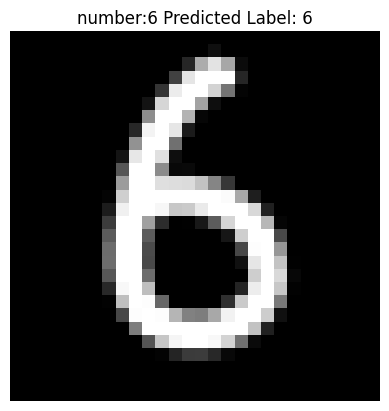

['5']
<class 'numpy.ndarray'>


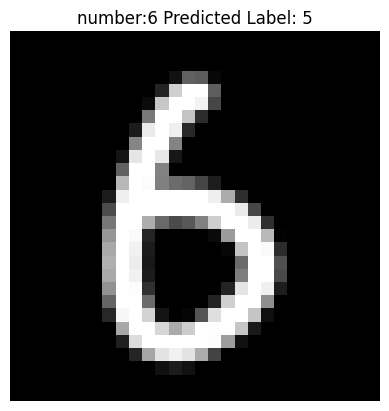

['5']
<class 'numpy.ndarray'>


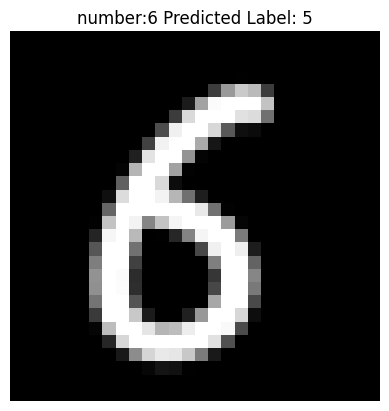

['3']
<class 'numpy.ndarray'>


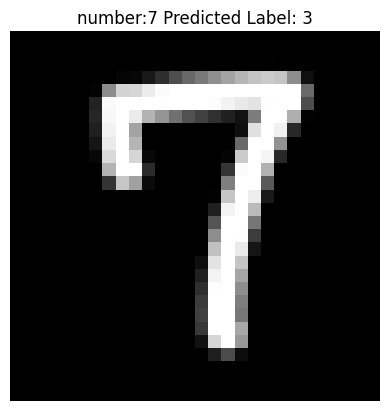

['3']
<class 'numpy.ndarray'>


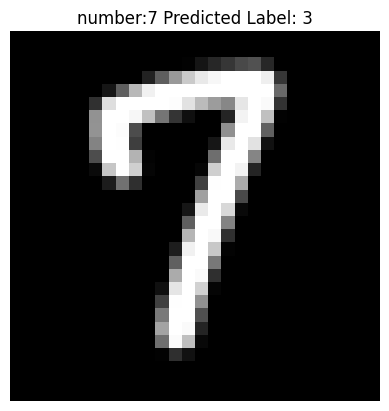

['9']
<class 'numpy.ndarray'>


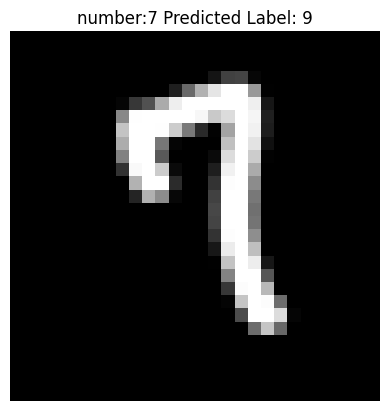

['8']
<class 'numpy.ndarray'>


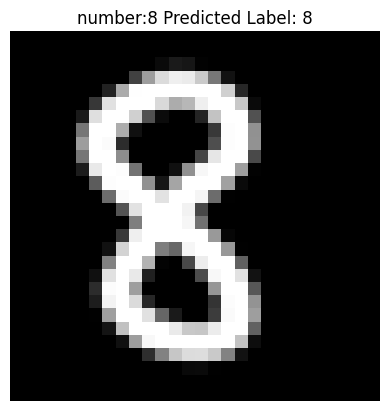

['8']
<class 'numpy.ndarray'>


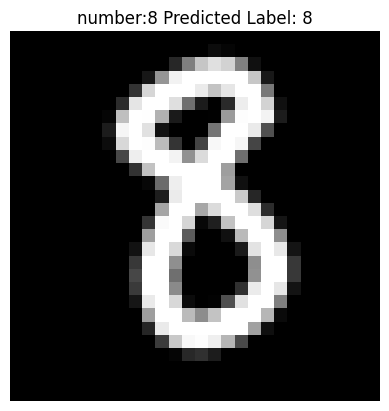

['8']
<class 'numpy.ndarray'>


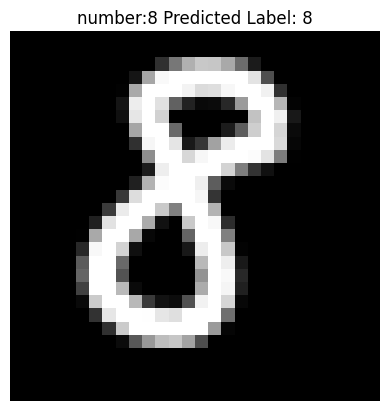

['8']
<class 'numpy.ndarray'>


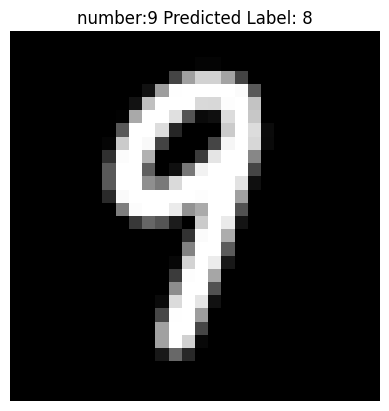

['9']
<class 'numpy.ndarray'>


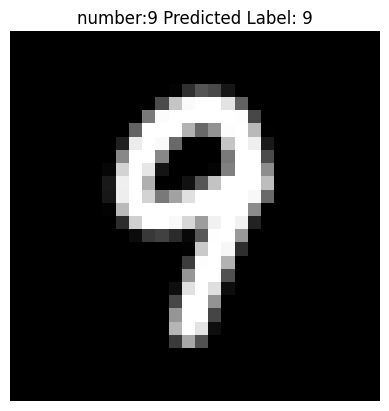

['8']
<class 'numpy.ndarray'>


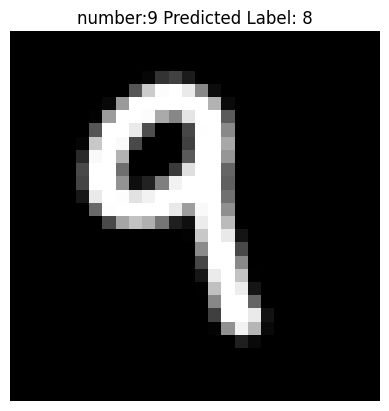

Accuracy: 0.6


In [2]:
# 手書き数字の予測
i = 0
predictionNum=[]
pred = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9] #正解ラベル
while i <= 9:
   y=0
   while y < 3:
      image = Image.open("digits_"+str(i) +'-'+str(y)+ '.png').convert('L')  # 手書き画像のパスを指定して読み込む
      image = image.resize((28, 28))  # 28x28にリサイズ
      image = np.array(image)  # NumPy配列に変換
      image = image.reshape(1, -1)  # 1次元の特徴量ベクトルに変換
      #image = image / 255.0  # スケーリング (0から1の範囲に正規化)
      image = 255.0 - image
      # モデルによる予測
      prediction = model.predict(image)
      predictionNum.append(int(prediction[0]))
      #testown = np.array([])
      #test = np.append(testown,prediction[0])
      print(prediction)
      print(type(prediction))
      y += 1
       
      # 結果の表示
      plt.imshow(image.reshape(28, 28), cmap='gray')
      plt.title("number:"+str(i)+" Predicted Label: " + str(prediction[0]))
      plt.axis('off')
      plt.show()
   i += 1

accuracy = accuracy_score(predictionNum, pred)
print("Accuracy:", accuracy)

